# Read and Clean

Firstly, we start with importing the necessary libraries and reading in the code:

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline


# Obviously, reading the data is a good start
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

Next, we'll add a function to aid in imputing missing values. Besides the dataframe, this function takes sequences (in this case, tuples) of categorical features and numeric features that require special handling.

Additionally, we're going to substitute categorical variables with dummy variables, so that we can get correlations and easily fit regression lines.

In [11]:
def fill_values(data, s_cats, s_nums):
    """
    Fill all the columns with the median or mode of the column, depending on type.
    
    :param data: The data frame containing the aforementioned columns.
    :param s_cats: Categorical columns requiring special handling
    :param s_nums: Numeric columns requiring special handling
    :return: The same data frame with the values filled in with medians and modes.
    """
    numeric_types = (np.dtype('int64'), np.dtype('float64'))

    for col in data.columns.values:
        if col in special_cats:
            data[col] = data[col].fillna('NoExist')
        elif col in special_nums:
            data[col] = data[col].fillna(0)
        elif data[col].dtype in numeric_types:
            data[col] = data[col].fillna(int(data[col].median()))
        elif data[col].dtype is np.dtype('object'):
            data[col] = data[col].fillna(data[col].mode().iloc[0])

    return data


def dummy_vars(data):
    """
    Replace categorical variables with dummy variables.

    :param data: The data frame containing the aforementioned columns.
    :return: Transformed data frame with dummy variables.
    """
    new_data = None

    for col in data.columns.values:
        if data[col].dtype is np.dtype('object'):
            dummies = pd.get_dummies(data[col])
            new_data = pd.concat([data, dummies], axis='columns')
            del new_data[col]

    return new_data


# Impute special values
special_cats = ('FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
                'GarageCond', 'PoolQC', 'Fence', 'MiscFeature')
special_nums = ('GarageYrBlt')

partial_clean_train = fill_values(train, special_cats, special_nums)
clean_train = (train.pipe(fill_values, s_cats=special_cats, s_nums=special_nums)
               .pipe(dummy_vars))

# Exploratory Analysis

Now that some basic house-cleaning has been taken care of, let's break for a bit of exploratory data analysis, featuring some super-cool visualizations!

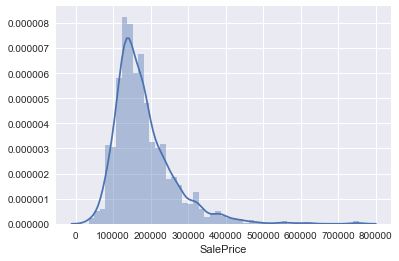

In [9]:
sns.set_style("darkgrid")
sns.distplot(clean_train['SalePrice'])

Turns out that houses in Ames are pretty cheap! Many below 200k and nearly all of them less than 300k! We'll now get the correlations of the numeric values and plot a heatmap of that data.

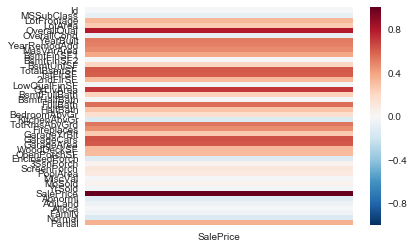

In [10]:
corr_frame = clean_train.corr()
sns.heatmap(pd.DataFrame(corr_frame.loc['SalePrice']))

Below, let's use a series of strip plots to try to get some idea of what categorical variables might be particularly predictive:

/home/sean/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


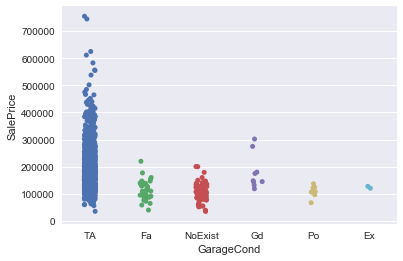

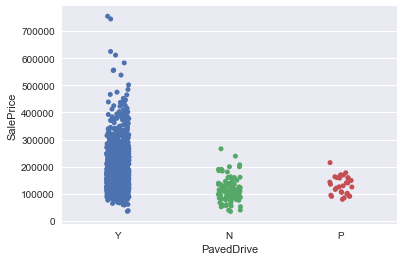

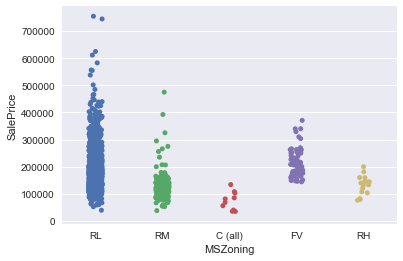

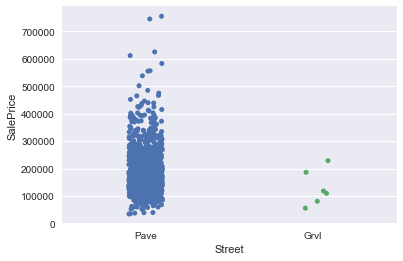

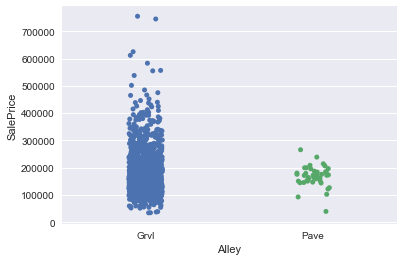

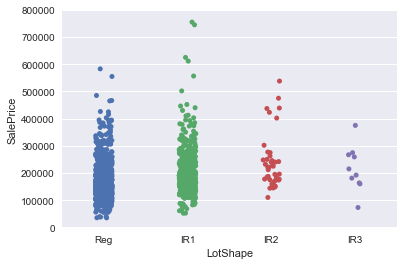

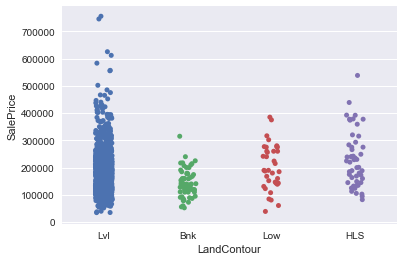

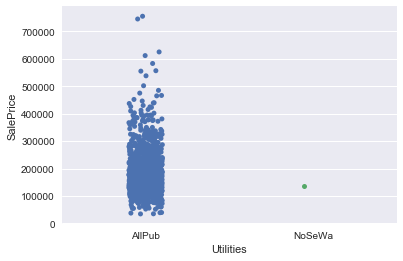

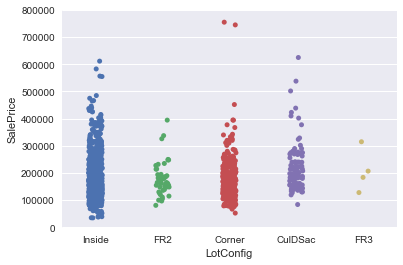

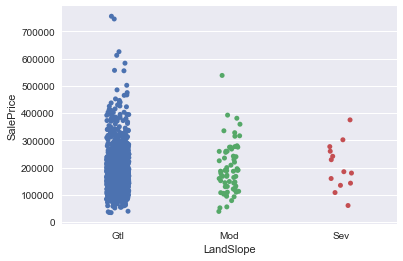

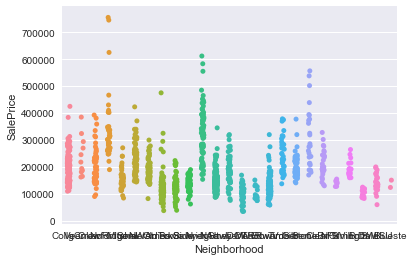

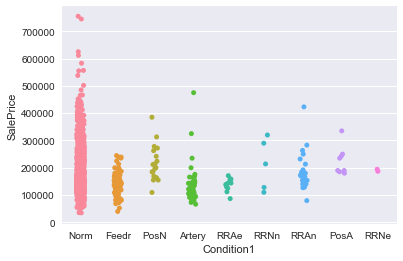

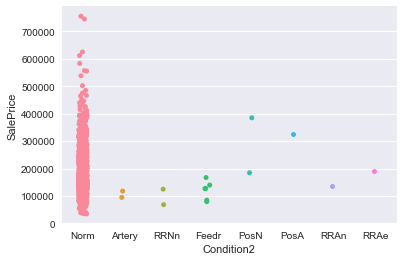

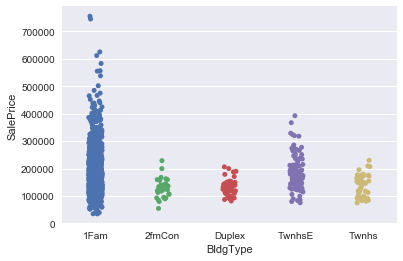

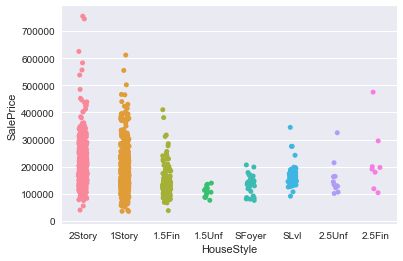

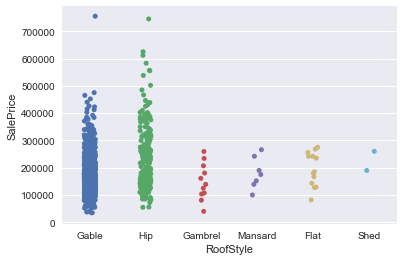

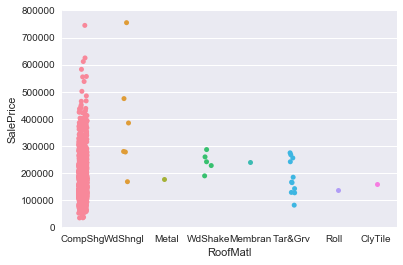

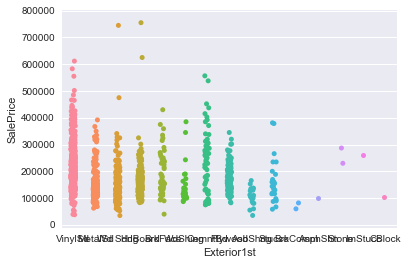

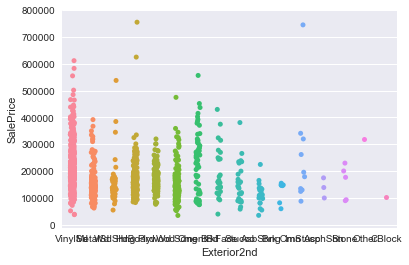

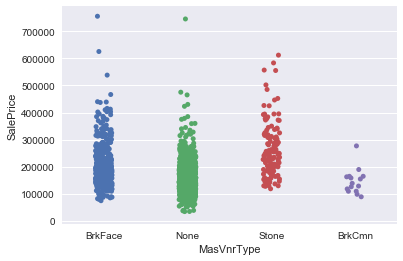

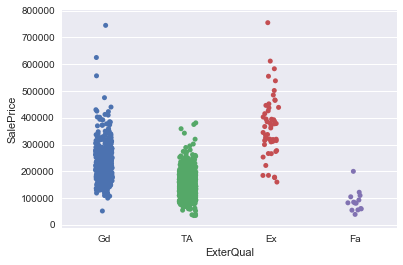

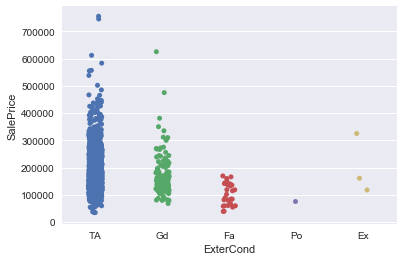

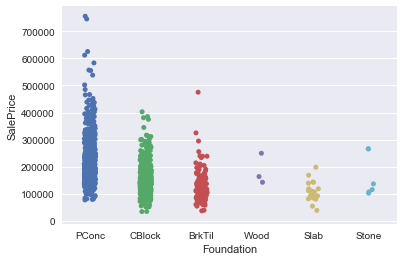

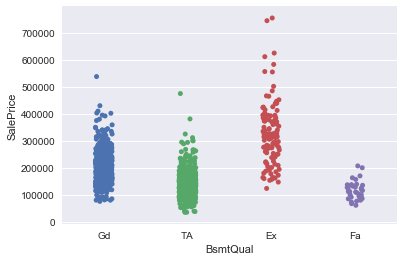

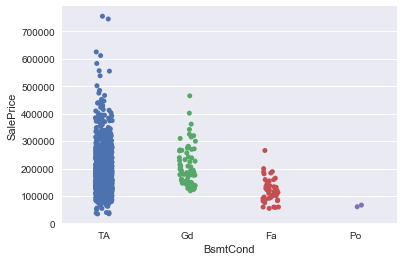

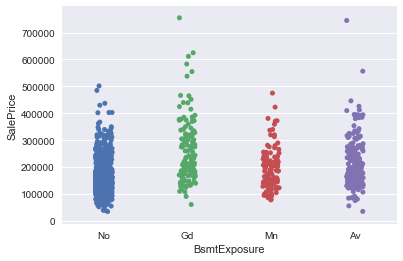

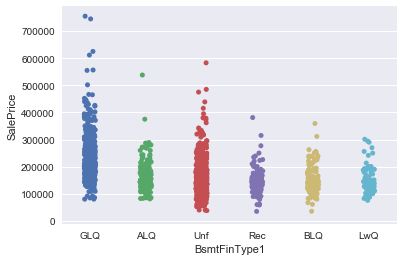

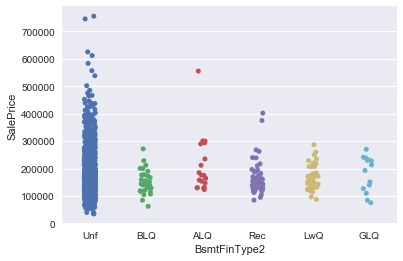

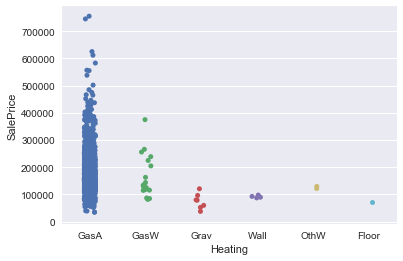

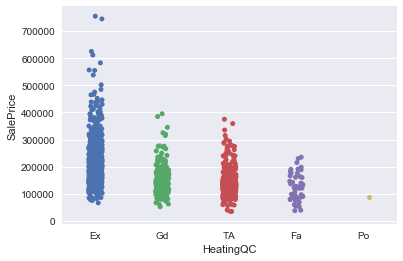

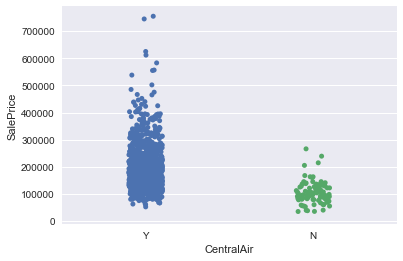

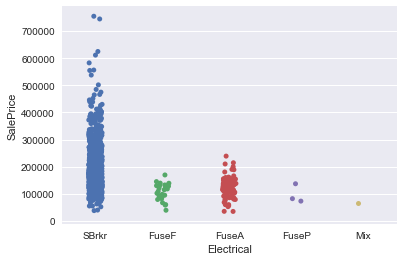

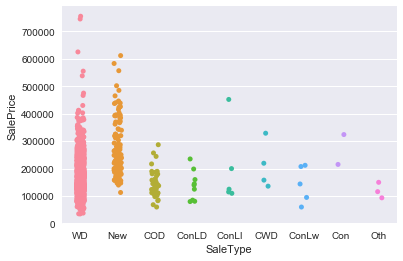

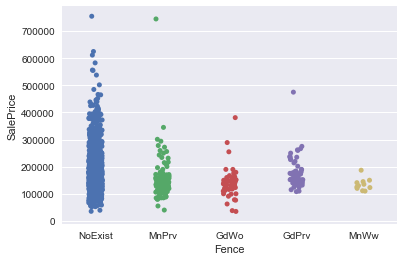

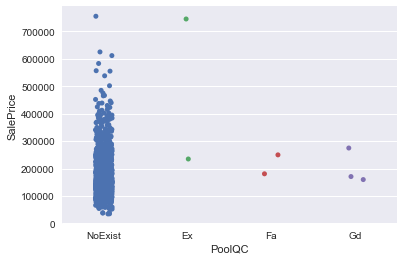

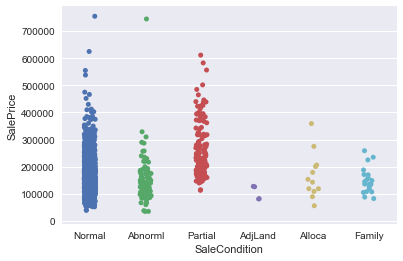

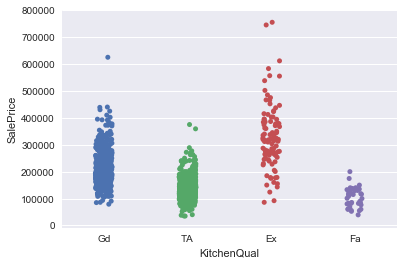

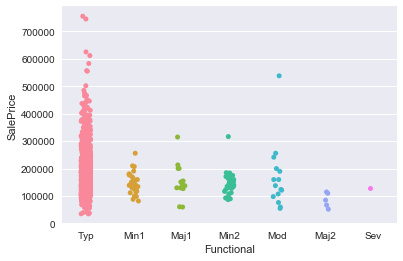

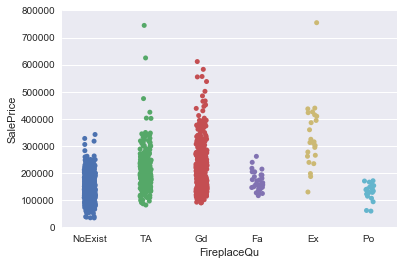

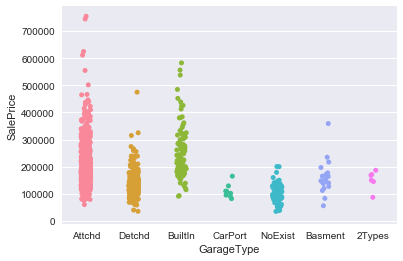

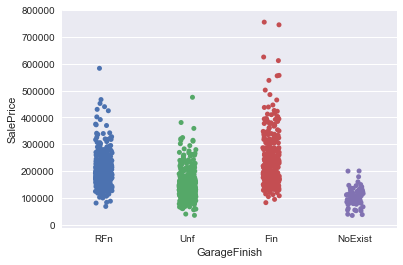

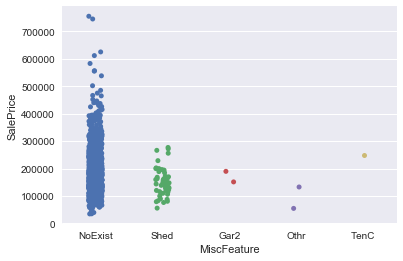

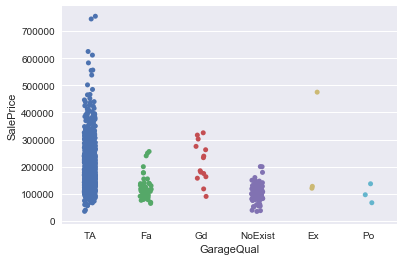

In [17]:
for num, col in enumerate(partial_clean_train.columns):
    if partial_clean_train[col].dtype is np.dtype('object'):
        plt.figure(num)
        sns.stripplot(x=col, y='SalePrice', data=partial_clean_train, jitter=True)

# Model Time!